In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
kaggle_visible_evaluation = pd. read_csv("kaggle_visible_evaluation_triplets.txt", sep="\t",names=['user_id','song_id','freq'])

In [3]:
kaggle_visible_evaluation.head()

,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [4]:
unique_tracks = pd. read_csv("unique_tracks.txt",sep='<SEP>',names= ['track_id','song_id','artist_name','title'])

In [5]:
unique_tracks.head()

,track_id,song_id,artist_name,title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [6]:
song_df = pd.merge(kaggle_visible_evaluation,unique_tracks.drop_duplicates(['song_id']), on="song_id", how="left")


In [7]:
song_df.head()

,user_id,song_id,freq,track_id,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


**Let's delete the unnessery columns**

In [8]:
song_df.drop(['track_id'],axis=1, inplace=True)

# Final data is

In [9]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [10]:
song_df.columns          # to know the column names in the data

Index(['user_id', 'song_id', 'freq', 'artist_name', 'title'], dtype='object')

In [11]:
song_df.shape            # to the shape of the data

(1450933, 5)

In [12]:
print('Total number of observations are:',song_df.shape[0])

Total number of observations are: 1450933


### Let's check is there any missing values ###

In [13]:
song_df.isnull().sum()

user_id        0
song_id        0
freq           0
artist_name    0
title          1
dtype: int64

- There is 1 missing value in the release column data. let's drop that row

In [14]:
song_df.dropna(inplace=True)

In [15]:
song_df.shape

(1450932, 5)

In [16]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   title        1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


- In the given data 4 are object type (**Categorical columns**) columns and 1 is int type(**Numaric type**)

### Let's look in to column by column 

## Univariate analysis

#### user 

In [17]:
print('Total number of users in the data are :',song_df.user_id.nunique())

Total number of users in the data are : 110000


In [18]:
song_df.user_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.user_id.value_counts().sort_values(ascending=False).head()

cddbaf7ec9763081d66df930f910aa4284c889f7    5
f7452b9dabac66080bc2ceccdb4d76cf2b78859b    5
cd920a50dae23931175a8ebdc97a66534a372184    5
fe38a4c79d6463e322f4644ed5f950af5c62fe1d    5
f6ed579f4b84f36905e4006c2a84849651a0b381    5
Name: user_id, dtype: int64

**************************************************


7d90be8dfdbde170f036ce8a4b915440137cb11c    53
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
d30e18323f15426c3cdc8585252ed34459916f51    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
Name: user_id, dtype: int64

In [19]:
user = pd.DataFrame(song_df.user_id.value_counts())

In [20]:
user[(user.user_id>20) & (user.user_id<31)]

,user_id
3f1c1e5e92748f40d6d4a195d4712505be82ff48,30
12478fdccc0ab275755ad17c1900abb657d1c651,30
612713d34f9f49f5e7b28d6c3bde3acebd08844c,30
1507a98c2a736133ab4a082c99481b69785bdcf0,30
4a9b64d89bd54f35c21a393ae57e6fa0ad2e9860,30
...,...
25282d2a39d4f5f282940ed00d899dcb646cf5f5,21
6a21c410422e83fd4dc65a2bf6828891c8fd3dcd,21
5bf5c2ab1ac4fd70437176470fc835ba45e31ebb,21
c8fc53ddfd93cb09450a8062d8639fb9923007d2,21


In [21]:
user_less_then_5 = list(user[user.user_id <6].index)
Between_6_to_10 = list(user[(user.user_id >5)&(user.user_id <11)].index)
Between_11_to_20 = list(user[(user.user_id >10)&(user.user_id<21)].index)
Between_21_to_30 = list(user[(user.user_id >20)&(user.user_id<31)].index)
Between_31_to_40 = list(user[(user.user_id >30)&(user.user_id<41)].index)
Between_41_to_50 = list(user[(user.user_id >40)&(user.user_id<51)].index)
user_more_then_5 = list(user[user.user_id >50].index)

In [22]:
user_data = {'less_then_5': len(user_less_then_5),\
            "Between_6_to_10":len(Between_6_to_10),\
            'Between_11_to_20':len(Between_11_to_20),\
            'Between_21_to_30':len(Between_21_to_30),\
            'Between_31_to_40':len(Between_31_to_40),\
            'Between_41_to_50':len(Between_41_to_50),\
            'user_more_then_5':len(user_more_then_5)}

In [23]:
user_data

{'less_then_5': 13097,
 'Between_6_to_10': 41221,
 'Between_11_to_20': 36179,
 'Between_21_to_30': 14392,
 'Between_31_to_40': 4525,
 'Between_41_to_50': 574,
 'user_more_then_5': 12}

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 7 artists>

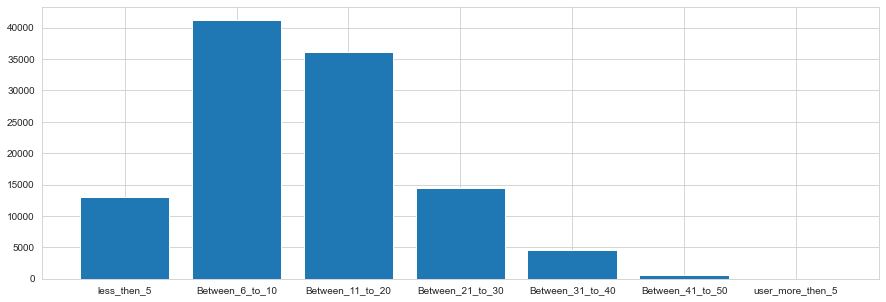

In [24]:
plt.figure(figsize=(15,5))
keys = user_data. keys()
values = user_data. values()
plt. bar(keys, values)


- As we are seeing the people who are listing songs in B/W 6 to 10 are more in the data

- From above one we can say that every user is listing minimum of **5** songs
- maximum number fo songs listed by single user in the given data is **53** songs

### song id

In [25]:
print('Total number of unique songs in the data are :',song_df.song_id.nunique())

Total number of unique songs in the data are : 163205


In [26]:
song_df.song_id.value_counts().sort_values(ascending=True).head()
print('**************************************************')
song_df.song_id.value_counts().sort_values(ascending=False).head()

SOCIDHC12AB0189063    1
SOLQWXL12A8C1346D0    1
SOIKIMN12B35058499    1
SOHSTXE12A8C140E96    1
SOLITQP12A6D4FB043    1
Name: song_id, dtype: int64

**************************************************


SOFRQTD12A81C233C0    5043
SOAUWYT12A81C206F1    4483
SOBONKR12A58A7A7E0    4136
SOAXGDH12A8C13F8A1    3780
SOSXLTC12AF72A7F54    3672
Name: song_id, dtype: int64

- **song id SOFRQTD12A81C233C0 is the highest number of listed song in the data.**
- **There are some songs that are just listned once by user**

In [27]:
(song_df.song_id.value_counts()==1).sum()

64746

In [28]:
song_info = pd.DataFrame(song_df.song_id.value_counts())

In [29]:
song_info.head()

,song_id
SOFRQTD12A81C233C0,5043
SOAUWYT12A81C206F1,4483
SOBONKR12A58A7A7E0,4136
SOAXGDH12A8C13F8A1,3780
SOSXLTC12AF72A7F54,3672


In [30]:
song_info[song_info.song_id==1]

,song_id
SOMPVIV12AF72A3C84,1
SOJAUET12AB018A7E8,1
SOJHEVD12A6D4F7623,1
SOPRFMS12A6D4F867D,1
SOGCUIP12A6D4FA6F7,1
...,...
SOADWVI12A6D4F7DB6,1
SOQRHTD12A6D4FBEBE,1
SOSZOOH12A8C13A4EA,1
SOMUEUH12AB0181EB7,1


In [31]:
(song_info[song_info.song_id==1].shape[0]/song_info.shape[0])*100

39.67157868937839

- **In the given data there are 64746 songs that are just once by the user in the entire data. This value is nearly 40% in the total songs.**

In [32]:
song_info[song_info.song_id>1000].index

Index(['SOFRQTD12A81C233C0', 'SOAUWYT12A81C206F1', 'SOBONKR12A58A7A7E0',
       'SOAXGDH12A8C13F8A1', 'SOSXLTC12AF72A7F54', 'SONYKOW12AB01849C9',
       'SOEGIYH12A6D4FC0E3', 'SODJWHY12A8C142CCE', 'SOLFXKT12AB017E3E0',
       'SOFLJQZ12A6D4FADA6', 'SOUSMXX12AB0185C24', 'SOUVTSM12AC468F6A7',
       'SOHTKMO12AB01843B0', 'SOTWNDJ12A8C143984', 'SOWCKVR12A8C142411',
       'SOBOUPA12A6D4F81F1', 'SOOFYTN12A6D4F9B35', 'SOPUCYA12A8C13A694',
       'SOVDSJC12A58A7A271', 'SOPPROJ12AB0184E18', 'SOKLRPJ12A8C13C3FE',
       'SOPTLQL12AB018D56F', 'SOUFTBI12AB0183F65', 'SODGVGW12AC9075A8D',
       'SOBOAFP12A8C131F36', 'SOSCIZP12AB0181D2F', 'SOCVTLJ12A6310F0FD',
       'SOLRGVL12A8C143BC3', 'SOFKABN12A8AE476C6', 'SOXFPND12AB017C9D1',
       'SOKUPAO12AB018D576', 'SOCKSGZ12A58A7CA4B', 'SOPXKYD12A6D4FA876',
       'SOUNZHU12A8AE47481', 'SOTWSXL12A8C143349', 'SOTCMDJ12A6D4F8528',
       'SOPQLBY12A6310E992', 'SOSZJFV12AB01878CB', 'SOULTKQ12AB018A183',
       'SOGPBAW12A6D4F9F22', 'SOUFPNI12A8C142D19', 

In [33]:
song_listned_morethen_1000 = list(song_info[song_info.song_id>999].index)
song_between_500_to_1000 = list(song_info[(song_info.song_id<1000)&(song_info.song_id>500)].index)
song_between_500_to_100= list(song_info[(song_info.song_id<501)&(song_info.song_id>101)].index)
song_between_100_to_50 = list(song_info[(song_info.song_id<101)&(song_info.song_id>50)].index)
song_between_50_to_10 = list(song_info[(song_info.song_id<51)&(song_info.song_id>10)].index)
song_between_10_to_5 = list(song_info[(song_info.song_id<11)&(song_info.song_id>5)].index)
song_less_then_5 = list(song_info[song_info.song_id<6].index)

In [34]:
song_data = {'song_listned_morethen_1000': len(song_listned_morethen_1000),\
            "song_between_500_to_1000":len(song_between_500_to_1000),\
            'song_between_500_to_100':len(song_between_500_to_100),\
            'song_between_100_to_50':len(song_between_100_to_50),\
            'song_between_50_to_10':len(song_between_50_to_10),\
            'song_between_10_to_5':len(song_between_10_to_5),\
            'song_less_then_5':len(song_less_then_5)}

In [35]:
song_data

{'song_listned_morethen_1000': 51,
 'song_between_500_to_1000': 108,
 'song_between_500_to_100': 1567,
 'song_between_100_to_50': 2919,
 'song_between_50_to_10': 19964,
 'song_between_10_to_5': 16993,
 'song_less_then_5': 121571}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

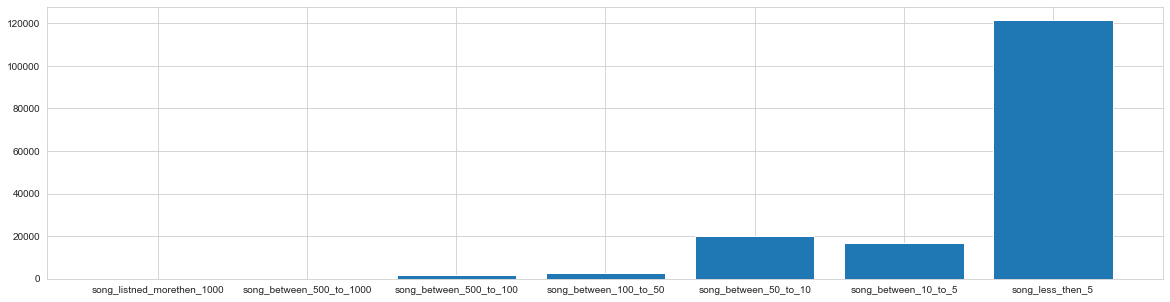

In [36]:
plt.figure(figsize=(20,5))
keys = song_data. keys()
values = song_data. values()
plt. bar(keys, values)


### Freq  

- Number of times user listned single song

In [37]:
song_df.freq.describe()                  # To get the basic staistics

count    1.450932e+06
mean     3.187151e+00
std      7.051666e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.230000e+02
Name: freq, dtype: float64

In [38]:
song_df[song_df.freq ==923]

,user_id,song_id,freq,artist_name,title
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


- maximum number of times a song is listned by user is 923
  - user id is **22bb29714137fa47083963c30e1a26f1bf517e7d**
  - song id is **SOXTUWG12AB018A2E2**

<AxesSubplot:xlabel='freq', ylabel='Density'>

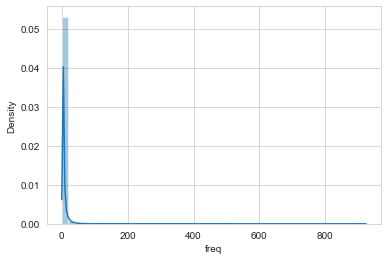

In [39]:
sns.distplot(song_df.freq,)

<Figure size 3600x288 with 0 Axes>

<AxesSubplot:>

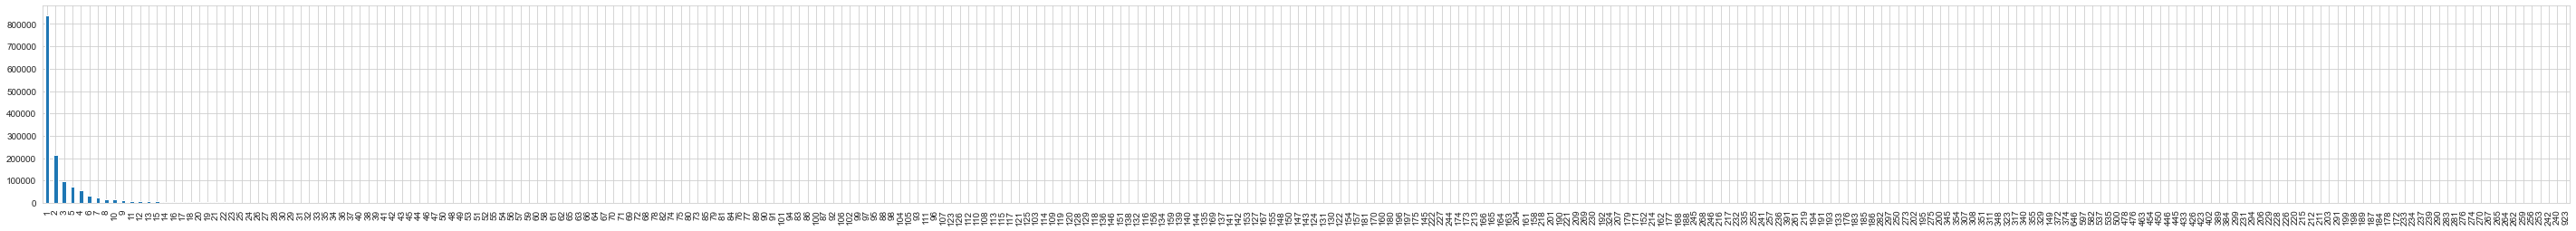

In [40]:
plt.figure(figsize=(50,4))

song_df.freq.value_counts().plot(kind='bar')

<AxesSubplot:>

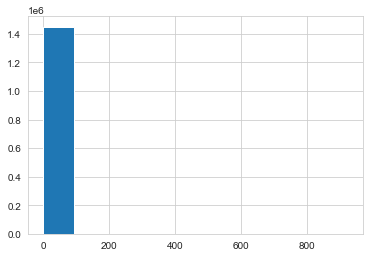

In [41]:
song_df.freq.hist()

- From the two plots we can see that the most of the songs listned in B/W 1-50

**Let's look in to the outliers**

In [42]:
def Upper_lower(col):
    Q1= np.percentile(col,25)
    Q3= np.percentile(col,75)
    IQR = Q3-Q1
    Upper = Q3+1.5*IQR
    Lower = Q1-1.5*IQR
    return(Upper,Lower)
    

In [43]:
Upper,Lower = Upper_lower(song_df.freq)
Upper,Lower

(6.0, -2.0)

In [44]:
song_df[(song_df.freq<Lower)|(song_df.freq>Upper)]

,user_id,song_id,freq,artist_name,title
28,9be82340a8b5ef32357fe5af957ccd54736ece95,SOHGGAH12A58A795BE,15,Slum Village,Climax
55,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SODBXDO12A6D4FCD4F,14,Dario Marianelli,Love Letters
62,91b8fac7dc5e03f6cfaf6e2aa7171f14a8354d62,SOUDGEV12A8C135FC9,10,Counting Crows / Vanessa Carlton,Big Yellow Taxi
86,0f40e074aab2c5f47b7ddc2277fb0295b5b3a058,SORIWEH12A8C13D4A6,54,Was (Not Was),The Sky's Ablaze
119,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOYOMRA12A6D4F9975,11,Phil Collins,You Can't Hurry Love
...,...,...,...,...,...
1450855,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOECSYA12A8C134C34,41,Catupecu Machu,Origen Extremo
1450856,07f2f354a2a4390624e0d04e4a555ef67e98f673,SODPPBT12A8C141D90,9,Kings Of Leon,Closer
1450859,07f2f354a2a4390624e0d04e4a555ef67e98f673,SOGMNZG12AB0182DAD,24,Veto,You Are A Knife
1450870,07f2f354a2a4390624e0d04e4a555ef67e98f673,SONGIXY12A58A7BB42,10,LCD Soundsystem,Someone Great


In [45]:
(song_df[(song_df.freq<Lower)|(song_df.freq>Upper)].shape[0]/song_df.shape[0])*100

9.770065034060865

<AxesSubplot:xlabel='freq'>

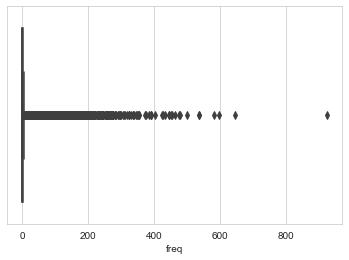

In [46]:
sns.boxplot(song_df.freq)

### Artist_name

In [47]:
artist  = pd.DataFrame(song_df.artist_name.value_counts())
artist

,artist_name
Coldplay,12279
Kings Of Leon,8514
Florence + The Machine,8213
Justin Bieber,7669
Jack Johnson,6784
...,...
Dandy Livingstone,1
Derrick Harriott / The Crystalites,1
The King Cole Trio,1
Surgery,1


- **There are  28360 artists in the given data**

In [48]:
# The top 10 populer artists in the given data are 

artist.index[:10]

Index(['Coldplay', 'Kings Of Leon', 'Florence + The Machine', 'Justin Bieber',
       'Jack Johnson', 'Train', 'The Black Keys', 'Eminem', 'OneRepublic',
       'Muse'],
      dtype='object')

<AxesSubplot:>

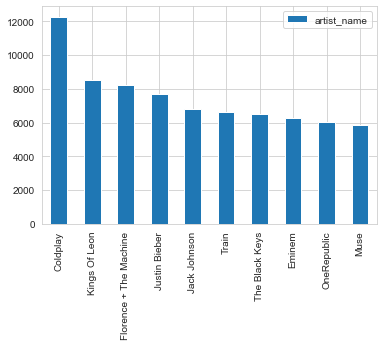

In [49]:
artist[:10].plot(kind='bar')

In [50]:
artist[artist.artist_name ==1]

,artist_name
Barkmarket,1
Romain Virgo,1
Wynona Carr,1
Eugene Francis Jnr,1
Angie Stone / Diamond Stone,1
...,...
Dandy Livingstone,1
Derrick Harriott / The Crystalites,1
The King Cole Trio,1
Surgery,1


In [51]:
artist[artist.artist_name <3].shape[0]/artist.shape[0]

0.29862482369534554

- There are few artists who are just occoured once or twise in the given data (**nearly 30%**)

- As we no the title and song id is representing the same 

In [52]:
artist_more_then_1000 = list(artist[artist.artist_name>999].index)
artist_between_500_to_1000 = list(artist[(artist.artist_name<1000)&(artist.artist_name>500)].index)
artist_between_500_to_100= list(artist[(artist.artist_name<501)&(artist.artist_name>101)].index)
artist_between_100_to_50 = list(artist[(artist.artist_name<101)&(artist.artist_name>50)].index)
artist_between_50_to_10 = list(artist[(artist.artist_name<51)&(song_info.song_id>10)].index)
artist_between_10_to_5 = list(artist[(artist.artist_name<11)&(artist.artist_name>5)].index)
artist_less_then_5 = list(artist[(artist.artist_name<6)].index)

In [53]:
len(artist_between_100_to_50)

1806

In [54]:
artist_data = {'artist_more_then_1000': len(artist_more_then_1000),\
            "artist_between_500_to_1000":len(artist_between_500_to_1000),\
            'artist_between_500_to_100':len(artist_between_500_to_100),\
            'artist_between_100_to_50':len(artist_between_100_to_50),\
            'artist_between_50_to_10':len(artist_between_50_to_10),\
            'artist_between_10_to_5':len(artist_between_10_to_5),\
            'artist_less_then_5':len(artist_less_then_5)}

In [55]:
artist_data

{'artist_more_then_1000': 214,
 'artist_between_500_to_1000': 309,
 'artist_between_500_to_100': 1958,
 'artist_between_100_to_50': 1806,
 'artist_between_50_to_10': 0,
 'artist_between_10_to_5': 3749,
 'artist_less_then_5': 13321}

<Figure size 1440x360 with 0 Axes>

<BarContainer object of 7 artists>

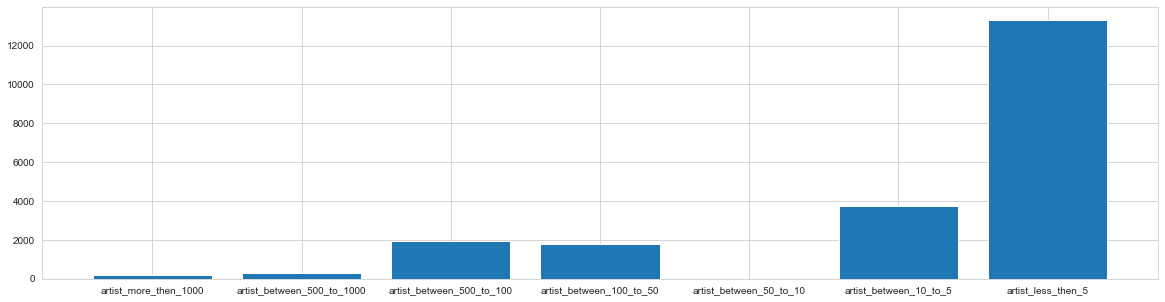

In [56]:
plt.figure(figsize=(20,5))
keys = artist_data. keys()
values = artist_data. values()
plt. bar(keys, values)


In [57]:
title_info = pd.DataFrame(song_df.title.value_counts())

In [58]:
title_info

,title
Sehr kosmisch,5043
Undo,4483
You're The One,4270
Dog Days Are Over (Radio Edit),3780
Revelry,3672
...,...
Mia (LP Version),1
Land Of The Miracle,1
Kitchen Girl,1
If I Had Left It Up To You (Live) (2001 Digital Remaster),1


In [59]:
title_info[:10].index

Index(['Sehr kosmisch', 'Undo', 'You're The One',
       'Dog Days Are Over (Radio Edit)', 'Revelry', 'Secrets',
       'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
       'Hey_ Soul Sister', 'Fireflies', 'Tive Sim'],
      dtype='object')

<AxesSubplot:>

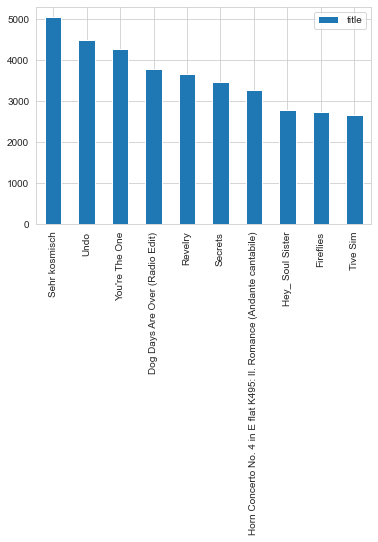

In [60]:
title_info[:10].plot(kind='bar')

- Top 10 populer songs in the data are shown in the above graph

In [61]:
title_info[title_info.title==1]

,title
No Song Unheard,1
The Unwinding Cable Car (Live Version),1
Sleepy Time Gal,1
Where Are You Now? (Batman Forever Sountrack),1
Devil'S Nightmare,1
...,...
Mia (LP Version),1
Land Of The Miracle,1
Kitchen Girl,1
If I Had Left It Up To You (Live) (2001 Digital Remaster),1


In [62]:
(title_info[title_info.title==1].shape[0]/title_info.shape[0])*100

37.21570679106539

- There are 51220  songs which are just listned once by the user in the entire data(**around 37%**)

In [63]:
song_df.head()

,user_id,song_id,freq,artist_name,title
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [64]:
song_df['song'] = song_df['artist_name'] +'-'+song_df['title']

In [65]:
song_df.head()

,user_id,song_id,freq,artist_name,title,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam-You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola-Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon-Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo-El Cuatrero


In [66]:
train_data_grouped = song_df.groupby(['song']).agg({'user_id': 'count'}).reset_index()
# The column named user_id is replaced by the name score.
train_data_grouped.rename(columns = {'user_id': 'score'}, inplace = True)

In [67]:
train_data_grouped.sort_values(['score'],ascending=False)

,song,score
59878,Harmonia-Sehr kosmisch,5043
17175,Björk-Undo,4483
42714,Dwight Yoakam-You're The One,4136
51326,Florence + The Machine-Dog Days Are Over (Radi...,3780
77664,Kings Of Leon-Revelry,3672
...,...,...
77919,Kitaro-Walk To The Village,1
77915,Kitaro-Sunset,1
77912,Kitaro-Reimei,1
77908,Kitaro-O Holy Night,1


In [68]:
train_data_sort = train_data_grouped.sort_values(['score', 'song'], ascending = [0,1])
train_data_sort

,song,score
59878,Harmonia-Sehr kosmisch,5043
17175,Björk-Undo,4483
42714,Dwight Yoakam-You're The One,4136
51326,Florence + The Machine-Dog Days Are Over (Radi...,3780
77664,Kings Of Leon-Revelry,3672
...,...,...
162028,Ólafur Arnalds-Himininn er að hrynja_ en stjör...,1
162030,Ólafur Arnalds-Kjurrt,1
162037,Ólafur Arnalds-Við vorum smá...,1
162041,Órla Fallon-The Water Is Wide,1


In [69]:
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending = False,method='first')

In [70]:
train_data_sort

,song,score,Rank
59878,Harmonia-Sehr kosmisch,5043,1.0
17175,Björk-Undo,4483,2.0
42714,Dwight Yoakam-You're The One,4136,3.0
51326,Florence + The Machine-Dog Days Are Over (Radi...,3780,4.0
77664,Kings Of Leon-Revelry,3672,5.0
...,...,...,...
162028,Ólafur Arnalds-Himininn er að hrynja_ en stjör...,1,162039.0
162030,Ólafur Arnalds-Kjurrt,1,162040.0
162037,Ólafur Arnalds-Við vorum smá...,1,162041.0
162041,Órla Fallon-The Water Is Wide,1,162042.0


In [71]:
popularity_recommendataions = train_data_sort.head(30)

In [72]:
popularity_recommendataions.shape

(30, 3)

In [73]:
song_df.head(10)

,user_id,song_id,freq,artist_name,title,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam-You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola-Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon-Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo-El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,Beastie Boys,Unite (2009 Digital Remaster),Beastie Boys-Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Moby,Lift Me Up,Moby-Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,Guano Apes,Living In A Lie,Guano Apes-Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Guano Apes,Open Your Eyes,Guano Apes-Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,UDG,Kurtizana,UDG-Kurtizana


In [74]:
user_listens_song = song_df.groupby('user_id')['song_id'].count() # dataframe to filter inactive users
songs_and_users = song_df.groupby('song_id')['user_id'].count() # dataframe to filter unpopular songs

final_users_list = user_listens_song[user_listens_song > 10].index.to_list() # specifying condition to filter users 
final_songs_list = songs_and_users[songs_and_users > 100].index.to_list() # specifying conditions to filter songs

In [75]:
# let us now filter our original dataset so that it contains only users who have listened more than 10 songs using the above variable
# and along with that let us also drop the unpopular songs i.e. we only keep the songs that a user has listened atleast 100 times.
# hence in the next two lines we are creating our final dataset after filtering the users
song_df_drop_users = song_df[song_df['user_id'].isin(final_users_list)].reset_index(drop=True)
song_df_final = song_df_drop_users[song_df_drop_users['song_id'].isin(final_songs_list)].reset_index(drop=True) # this is our final dataframe

# here we will be printing the characteristics of our final dataset that we have created after filtering songs and users.

print('shape of original songs dataset: ', song_df.shape)
print('shape of songs dataset after dropping inactive users: ', song_df_drop_users.shape)
print('shape of songs dataset after dropping unpopualar songs and inactive users both is: ', song_df_final.shape)
print("")
print("therefore our final dataset after removing the inactive users and unpopular songs has these many observations:  ",song_df_final.shape[0])
print("")
#songs_df_final.head(5)

shape of original songs dataset:  (1450932, 6)
shape of songs dataset after dropping inactive users:  (1067426, 6)
shape of songs dataset after dropping unpopualar songs and inactive users both is:  (319229, 6)

therefore our final dataset after removing the inactive users and unpopular songs has these many observations:   319229



In [76]:
song_df_final =song_df_final[:1450932]
song_df_final.shape

(319229, 6)

In [77]:
# here we are creating the pivot table from our dataset and filling the null values with "0" using the fillna() function.
songs_df_pivot = song_df_final.pivot(
    index='user_id', 
    columns='song_id', 
    values='freq').fillna(0)
songs_df_pivot.head(5)
#songs_df_pivot.shape

song_id,SOAAROC12A6D4FA420,SOAAVUV12AB0186646,SOAAWEE12A6D4FBEC8,SOABHYV12A6D4F6D0F,SOABJBU12A8C13F63F,SOACIPG12A8AE47E1C,SOADISH12AB018DFAC,SOADJQJ12A8C141D38,SOADOQJ12A8AE45C7E,SOADQPP12A67020C82,...,SOZVVMJ12A58A7C548,SOZVVRE12A8C143150,SOZWWTF12A8C1408E2,SOZXHNM12AB017CDEA,SOZXKIA12A6D4F861C,SOZXMYX12AB018A445,SOZYDZR12A8C13F4F0,SOZYSDT12A8C13BFD7,SOZYUGZ12A8AE472AC,SOZZTNF12A8C139916
user_id,,,,,,,,,,,,,,,,,,,,,
00014a76ed063e1a749171a253bca9d9a0ff1782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00015189668691680bb1a2e58afde1541ec92ced,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00020fcd8b01986a6a85b896ccde6c49f35142ad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003798d61a8010dbfd8010180b7107cbbb8a649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003d5245414b9c6244046543a06f601bfc97949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# converting the pivot table to array using to_numpy() function.   
song_df_array = songs_df_pivot.to_numpy()  
#finding the mean for every user's freq
user_freq_count_mean = np.mean(song_df_array, axis = 1) 
# normalizing our data by subtracting mean from the array
song_df_array_norm = song_df_array - user_freq_count_mean.reshape(-1, 1)    

In [79]:
song_df_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
user_freq_count_mean.reshape(-1,1)

array([[0.0039818 ],
       [0.03412969],
       [0.00056883],
       ...,
       [0.02673493],
       [0.00682594],
       [0.00113766]])

In [81]:
# printing our normalized array
song_df_array_norm       

array([[-0.0039818 , -0.0039818 , -0.0039818 , ..., -0.0039818 ,
        -0.0039818 , -0.0039818 ],
       [-0.03412969, -0.03412969, -0.03412969, ..., -0.03412969,
        -0.03412969, -0.03412969],
       [-0.00056883, -0.00056883, -0.00056883, ..., -0.00056883,
        -0.00056883, -0.00056883],
       ...,
       [-0.02673493, -0.02673493, -0.02673493, ..., -0.02673493,
        -0.02673493, -0.02673493],
       [-0.00682594, -0.00682594, -0.00682594, ..., -0.00682594,
        -0.00682594, -0.00682594],
       [-0.00113766, -0.00113766, -0.00113766, ..., -0.00113766,
        -0.00113766, -0.00113766]])

### Basics of Singular Value Decomposition¶
Now as we have a very sparse matrix, so we will be using the SVD algorithm from the scipy.sparse.linalg library
SVDs from scipy.sparse.linalg computes the largest or smallest k singular values/vectors for a sparse matrix.
In the svds function we will input two things - our sparse matrix i.e. R_demeaned and k which is number of singular values and vectors to compute.
the svds function will output three matrices to us - U, Sigma, and Vtranspose.
The contents/ details of every matrix is described below

U matrix - The relationship between users and latent factors is represented by U, a m x r orthogonal left singular matrix.
Sigma Matrix - S is a r x r diagonal matrix, which describes the strength of each latent factor.
V transpose Matrix - V is a r x n diagonal right singular matrix that shows how items and latent factors are connected.
The latent factors here are the characteristics of the item. By removing the utility matrix A's latent factors, the SVD reduces its dimension. It creates an r-dimensional latent space for each user and item. This mapping makes it easier to see the connections between users and items.

In [82]:
# as described above we will import the svds function from the scipy.sparse.linalg library because we have a sparse matrix.
from scipy.sparse.linalg import svds
U_matrix, sigma_matrix, V_t_matrix = svds(song_df_array_norm, k = 50)

## Creating Predicted Dataframe based on predicted ratings
## Usinf SVD

In [83]:
sigma_matrix = np.diag(sigma_matrix)

# here we are first taking the dot product of the U_matrix and the sigma_matrix
# in the next step, we are taking the dot product of the dot product of U and sigma matrix and V transpose Matrix
# finally we will be adding the mean of the user_freq_count to the dot product above as the regularization term


Predicted_Ratings_users = np.dot(np.dot(U_matrix, sigma_matrix), V_t_matrix) + user_freq_count_mean.reshape(-1, 1)

# here we are creating our predicted data frame based on the predicted ratings we have calculated above

df_predicted_data = pd.DataFrame(Predicted_Ratings_users, columns = songs_df_pivot.columns)
df_predicted_data.head()

song_id,SOAAROC12A6D4FA420,SOAAVUV12AB0186646,SOAAWEE12A6D4FBEC8,SOABHYV12A6D4F6D0F,SOABJBU12A8C13F63F,SOACIPG12A8AE47E1C,SOADISH12AB018DFAC,SOADJQJ12A8C141D38,SOADOQJ12A8AE45C7E,SOADQPP12A67020C82,...,SOZVVMJ12A58A7C548,SOZVVRE12A8C143150,SOZWWTF12A8C1408E2,SOZXHNM12AB017CDEA,SOZXKIA12A6D4F861C,SOZXMYX12AB018A445,SOZYDZR12A8C13F4F0,SOZYSDT12A8C13BFD7,SOZYUGZ12A8AE472AC,SOZZTNF12A8C139916
0,0.000487,-0.000964,-0.001350,0.001906,-0.001918,-0.000950,0.001200,-0.007204,0.001008,0.000360,...,0.007009,-0.086732,0.000769,0.000112,0.000702,0.008534,0.000432,0.000960,-0.000595,-0.000743
1,0.034029,0.028250,0.034174,0.033649,0.035722,0.034627,0.033985,0.092698,0.034199,0.033571,...,0.034184,0.008388,0.033691,0.033559,0.034070,0.033726,0.034216,0.041657,0.036234,0.034241
2,0.000639,0.000521,0.000624,0.000618,0.000599,0.000630,0.000645,-0.000090,0.000639,0.000578,...,0.000640,-0.000796,0.000644,0.000635,0.000637,0.000643,0.000637,0.000563,0.000627,0.000641
3,0.005957,0.017903,0.009308,0.003937,0.030525,0.001654,0.003270,0.174886,0.003203,0.011993,...,0.003729,0.042965,0.005161,0.005128,0.005812,0.003576,0.003294,0.019445,0.001648,0.003686
4,0.001482,0.002205,0.001226,0.001252,0.002841,0.000764,0.001137,0.001409,0.001035,0.006019,...,0.001184,-0.008796,0.001007,0.000830,0.001200,0.002122,0.001230,0.000320,0.000867,0.000480


## Using surprise library for song predictions

### Evaluating the RMSE of our model¶
Through a library called Surprise , we will be finding out the rmse.

1. Surprise is a library in Python used for analyzing recommender systems.
2. It is used to calculate the RMSE of our model.
3. RMSE - RMSE stands for Root Mean Squared Error. This is defined as the square root of the average squared distance between the actual score and the predicted score

In [84]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split    # from the surprise library we are importing all necessary libraries
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [85]:
song_df

,user_id,song_id,freq,artist_name,title,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam-You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola-Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon-Catch You Baby (Steve Pitron & M...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo-El Cuatrero
...,...,...,...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1,Mos Def,Ms. Fat Booty,Mos Def-Ms. Fat Booty
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2,Sam Cooke,Ain't Misbehavin,Sam Cooke-Ain't Misbehavin
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2,Southside Spinners,Luvstruck,Southside Spinners-Luvstruck
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2,J. Karjalainen & Mustat Lasit,Sinisten tähtien alla,J. Karjalainen & Mustat Lasit-Sinisten tähtien...


In [86]:
song_user = song_df.groupby('song_id')['user_id'].count()  # counting the number of songs listened by each user

In [87]:
user_listens_song = song_df.groupby('user_id')['song_id'].count() # dataframe to filter inactive users
songs_and_users = song_df.groupby('song_id')['user_id'].count() # dataframe to filter unpopular songs

final_users_list = user_listens_song[user_listens_song > 10].index.to_list() # specifying condition to filter users 
final_songs_list = songs_and_users[songs_and_users > 100].index.to_list() # specifying conditions to filter songs

In [88]:
# Finally we are combining both the dataframes to arrive at our final dataframe.
# our final dataframe consists of users who have listened to more than 10 songs 
# and songs which have been listened to more than 100 times

song_df_drop_users = song_df[song_df['user_id'].isin(final_users_list)].reset_index(drop=True)
song_df_final = song_df_drop_users[song_df_drop_users['song_id'].isin(final_songs_list)].reset_index(drop=True) # this is our final dataframe

# here we will be printing the characteristics of our final dataset that we have created after filtering songs and users.

print('shape of original songs dataset: ', song_df.shape)
print('shape of songs dataset after dropping inactive users: ', song_df_drop_users.shape)
print('shape of songs dataset after dropping unpopualar songs and inactive users both is: ', song_df_final.shape)
print("")
print("therefore our final dataset after removing the inactive users and unpopular songs has these many observations:  ",song_df_final.shape[0])
print("")
#song_df_final.head(5)

shape of original songs dataset:  (1450932, 6)
shape of songs dataset after dropping inactive users:  (1067426, 6)
shape of songs dataset after dropping unpopualar songs and inactive users both is:  (319229, 6)

therefore our final dataset after removing the inactive users and unpopular songs has these many observations:   319229



In [89]:
#This is our final reduced dataframe
song_df_final.head(5)

,user_id,song_id,freq,artist_name,title,song
0,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Moby,Lift Me Up,Moby-Lift Me Up
1,9be82340a8b5ef32357fe5af957ccd54736ece95,SOFEGST12A58A7D682,1,Vampire Weekend,Oxford Comma (Album),Vampire Weekend-Oxford Comma (Album)
2,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SOSHJHA12AB0181410,1,A Day To Remember,The Downfall Of Us All,A Day To Remember-The Downfall Of Us All
3,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8,SOEIKRK12AB017D6E0,2,A Day To Remember,Have Faith In Me,A Day To Remember-Have Faith In Me
4,ef0d21935a2f8ae90571dbfab800f87fa5b38769,SOHOTAA12A8AE45F43,1,Octopus Project,Marshall Examines His Carcass,Octopus Project-Marshall Examines His Carcass


In [90]:
song_df_final.shape

(319229, 6)

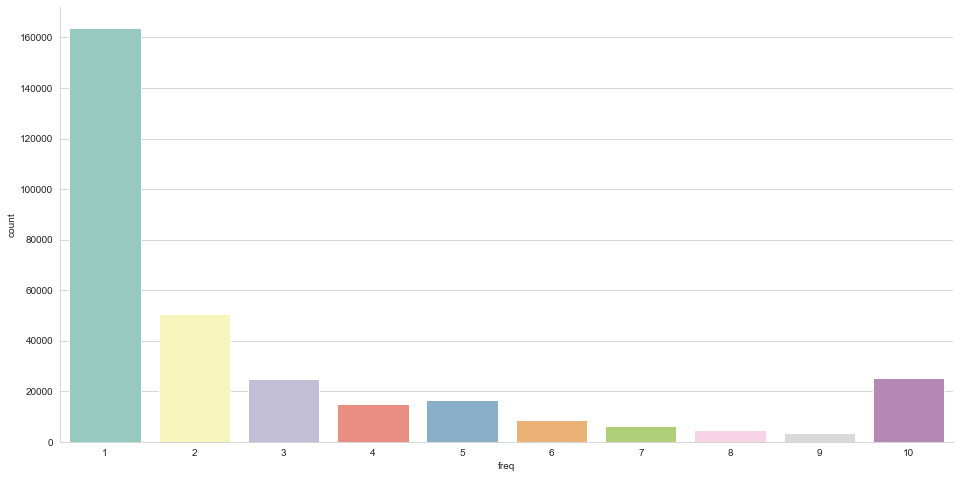

In [91]:
# our next step is to divide the freq value in bins.
# now our highest freq value is 2214 so we create ten bins
# any listen_count value between 9 and 2214 is part of the last bin
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]
song_df_final['freq'] = pd.cut(song_df_final['freq'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
freq_counts = pd.DataFrame(song_df_final.groupby('freq').size(), columns=['count']).reset_index(drop=False)

plt.figure(figsize=(16, 8))
sns.barplot(x='freq', y='count', palette='Set3', data=freq_counts) # plotting the bar plot of the freq values we created
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [92]:
reader = Reader(rating_scale=(1, 10)) # The Reader class in surprise library is used to parse a file containing ratings
data = Dataset.load_from_df(song_df_final[['user_id', 'song_id', 'freq']], reader)

In [93]:
trainset, testset = train_test_split(data, test_size=.25) # here we are splitting the data into training and testing

In [94]:
# here we are defining the list of hyperparameters that we want GridsearchCV to check and give us the best hyperparameters in output

param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],  
              'reg_all': [0.08, 0.1]}

## How does GridSearchCV work?
1. Once specifying hyperparameters and an array of potential values in the param_grid dictionary, GridSearchCV() calculates a score for each combination of hyperparameters on a k-fold cross validated dataset and returns the set of parameters that minimises the mean score across folds. Both the number of folds and the score can be selected by the user (hyper-hyperparameter?!) — we use 3 folds and RMSE accuracy score.

2. The parameters that we are using in GridsearchCV are -

3. estimator - the model for which we want to find the best hyperparameters
4. param_grid - the dictionary in which we have specified the hyperparameters we want to try
5. cv - No of cross-validations we want our model to execute.
6. n_jobs - number of procedures that we wish to run in parallel.
7. joblib_verbose - in order to get a detailed print out while we try to fit the data to GridSearchCV

In [95]:
# here we are defining the parameters and passing it to the GridSearchCV function
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)

In [96]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']    #Using an accuracy measure as key, get the algorithm that gave the best accuracy results for the chosen measure, averaged over all splits.
print(grid_search_svd.best_score['rmse'])    # here we are printing the best rmse score that our GridSearchCV got
print(grid_search_svd.best_params['rmse'])  # here we are printing the best parameters that our GridsearchCV found out

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


2.5010538103355273
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.005, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed: 21.1min finished


In [97]:
# Now we will perform the cross validation using the cross_validate function
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.4565  2.4766  2.4748  2.4856  2.4769  2.4741  0.0095  
Fit time          211.20  231.51  251.45  248.07  283.88  245.22  24.03   
Test time         1.37    1.08    1.39    0.99    1.40    1.25    0.17    


{'test_rmse': array([2.4565081 , 2.47657015, 2.47481955, 2.48558139, 2.47688075]),
 'fit_time': (211.20444440841675,
  231.51254630088806,
  251.45188069343567,
  248.0681173801422,
  283.87554574012756),
 'test_time': (1.3744711875915527,
  1.083831548690796,
  1.3897569179534912,
  0.9933276176452637,
  1.3994650840759277)}

In [99]:
# finally we will input the best parameters that we found above using GridSearchCV in our final algorithm
# Then we will fit the final_algorithm to our training set
# and finally we will test the test dataset and print out the RMSE score.

final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.1)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.4809
The RMSE is 2.4808994429763134
